# Connecting to Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
# Step 1: Import necessary libraries
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import seaborn as sns
import matplotlib.pyplot as plt

# Imprting Data

In [3]:
import pandas as pd
dataset = pd.read_csv('/content/drive/MyDrive/dataset.csv')
dataset.head()

fault      max      min      mean        sd       rms  skewness  \
0  Ball_007_1  0.35986 -0.41890  0.017840  0.122746  0.124006 -0.118571   
1  Ball_007_1  0.46772 -0.36111  0.022255  0.132488  0.134312  0.174699   
2  Ball_007_1  0.46855 -0.43809  0.020470  0.149651  0.151008  0.040339   
3  Ball_007_1  0.58475 -0.54303  0.020960  0.157067  0.158422 -0.023266   
4  Ball_007_1  0.44685 -0.57891  0.022167  0.138189  0.139922 -0.081534   

   kurtosis     crest      form  
0 -0.042219  2.901946  6.950855  
1 -0.081548  3.482334  6.035202  
2 -0.274069  3.102819  7.376926  
3  0.134692  3.691097  7.558387  
4  0.402783  3.193561  6.312085

# Correlation Matrix

In [ ]:
# Identify numeric columns
numeric_columns = dataset.select_dtypes(include=['float64', 'int64']).columns

# Plot correlation matrix for numeric features
plt.figure(figsize=(10, 8))
correlation_matrix = dataset[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

# Frequency Distribution

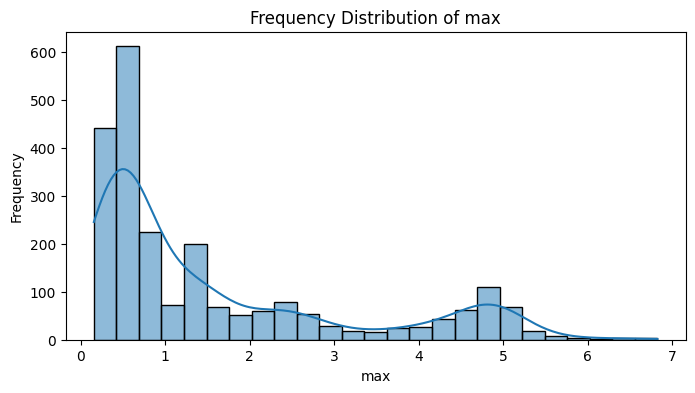

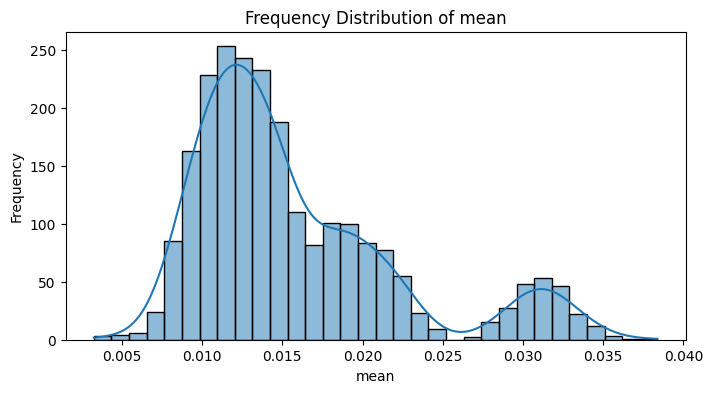

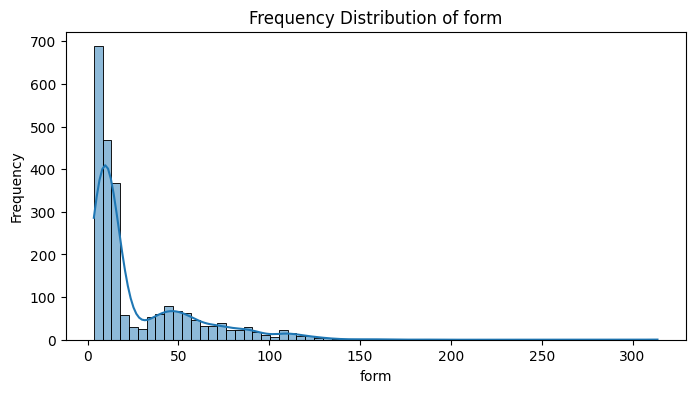

In [ ]:
# Plot frequency distribution of each numeric feature
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(dataset[column], kde=True)
    plt.title(f'Frequency Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Violin Plots

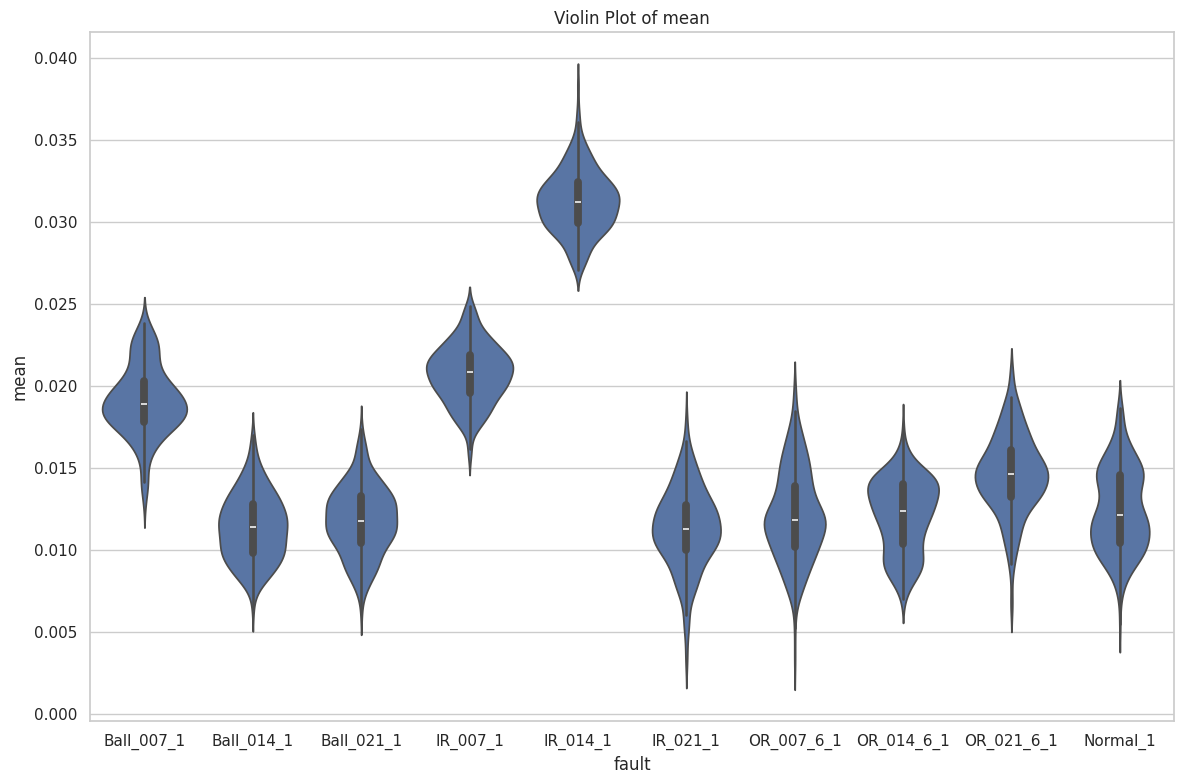

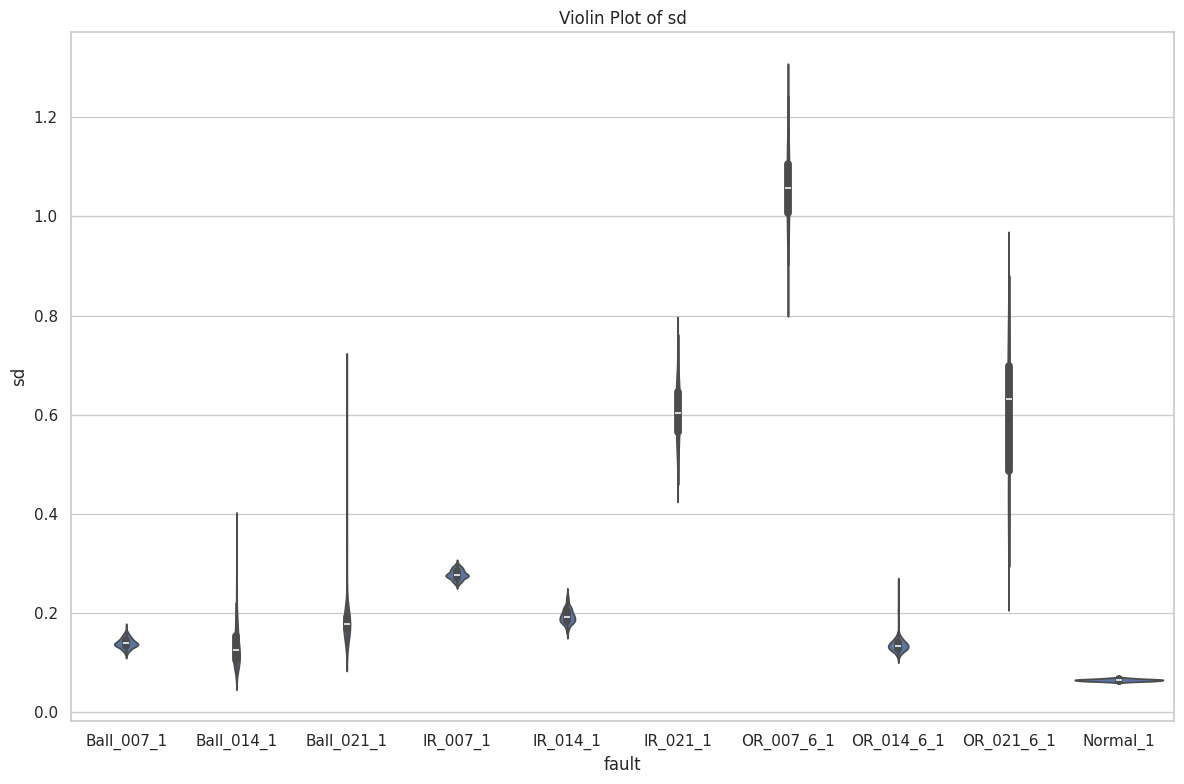

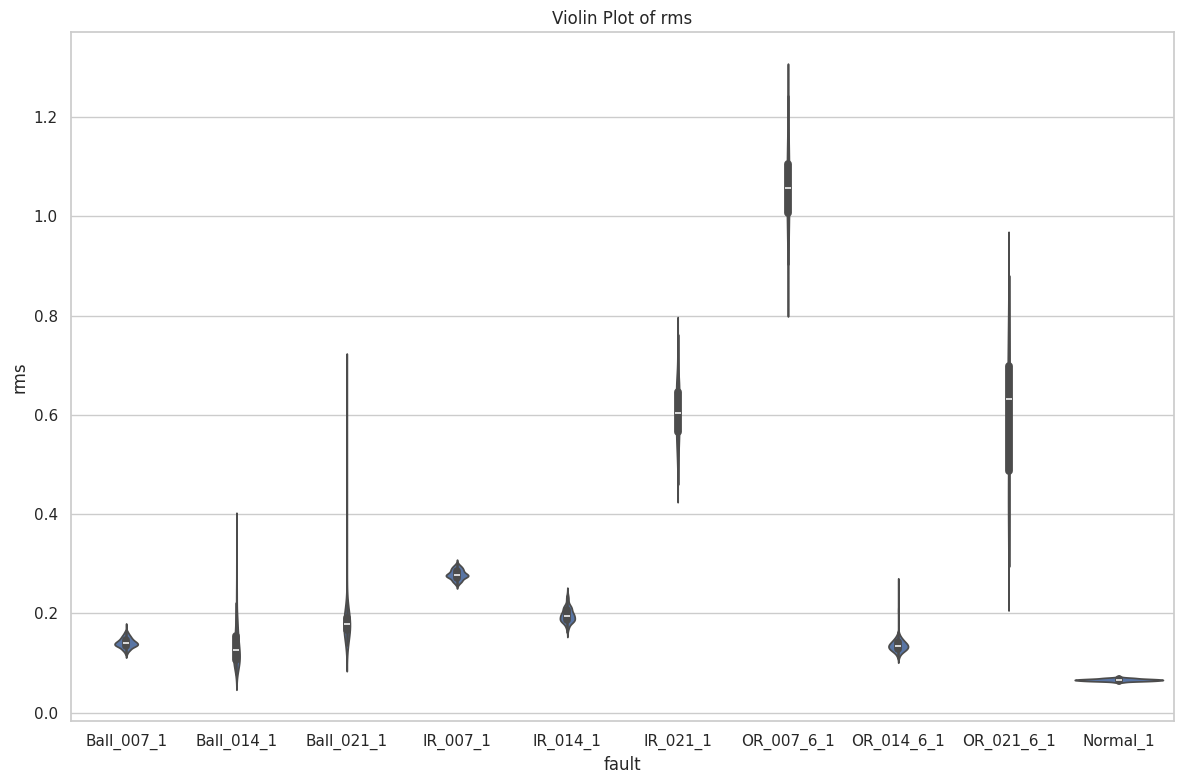

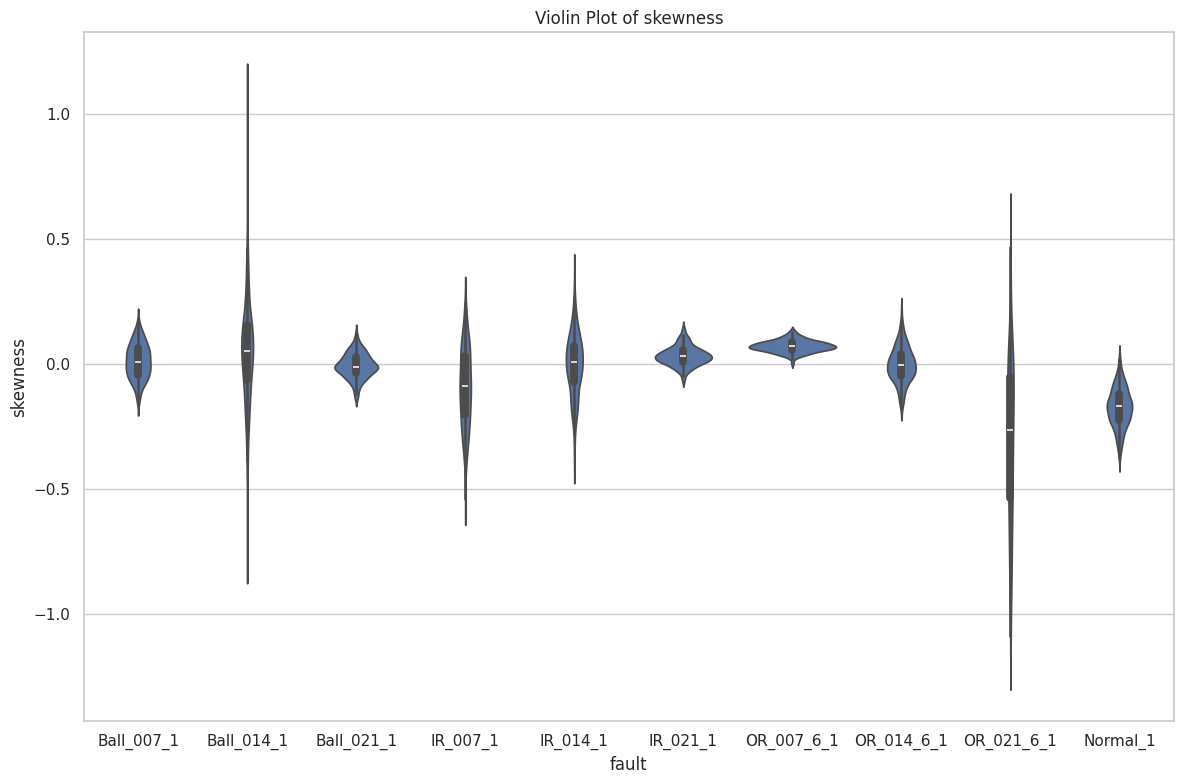

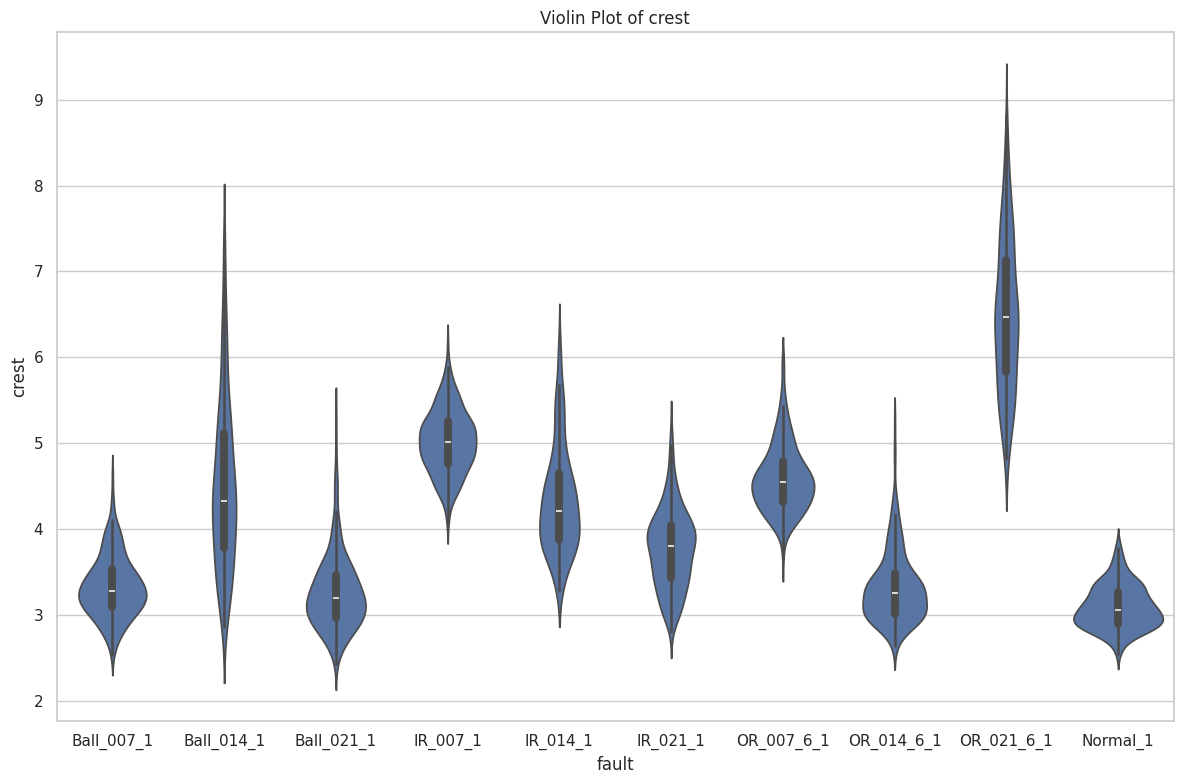

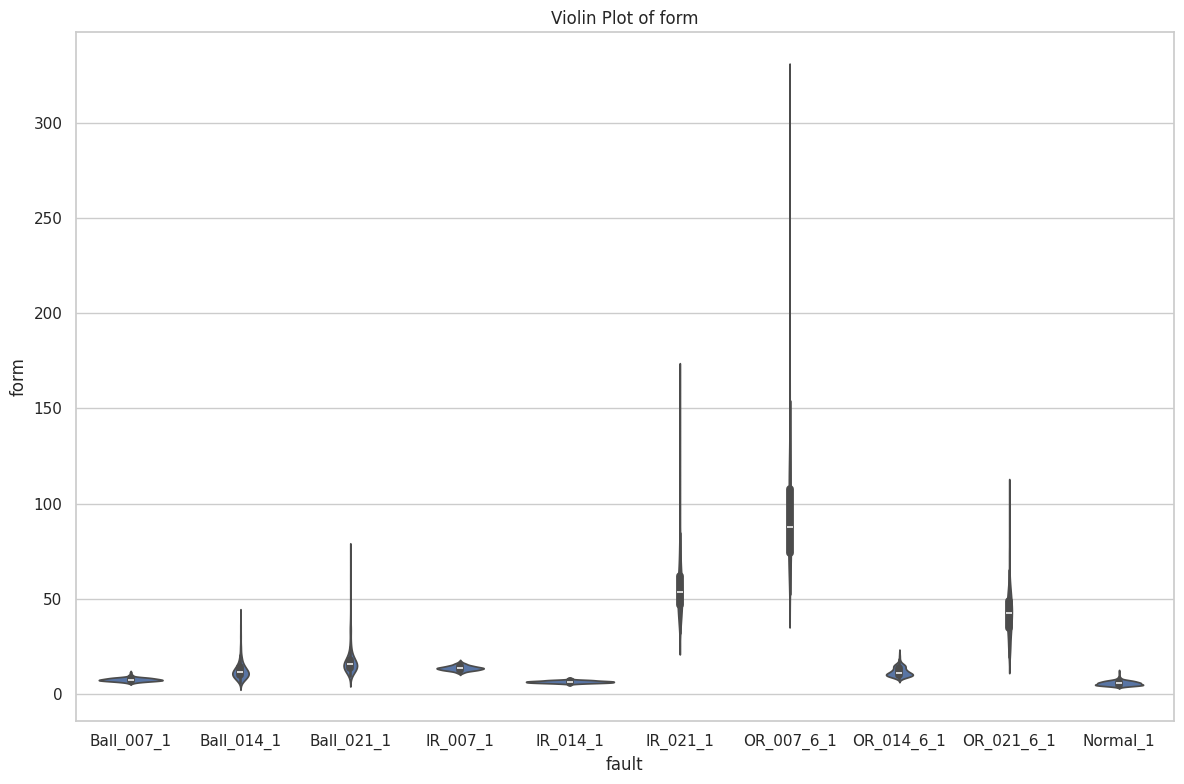

In [ ]:
# Set the style for the plots
sns.set(style="whitegrid")

# Violin Plots
for i, col in enumerate(dataset.columns[-9:]):
    plt.figure(figsize=(12, 8))
    sns.violinplot(x='fault', y=col, data=dataset)
    plt.title(f'Violin Plot of {col}')
    plt.tight_layout()
    plt.show()

# Pair Grid

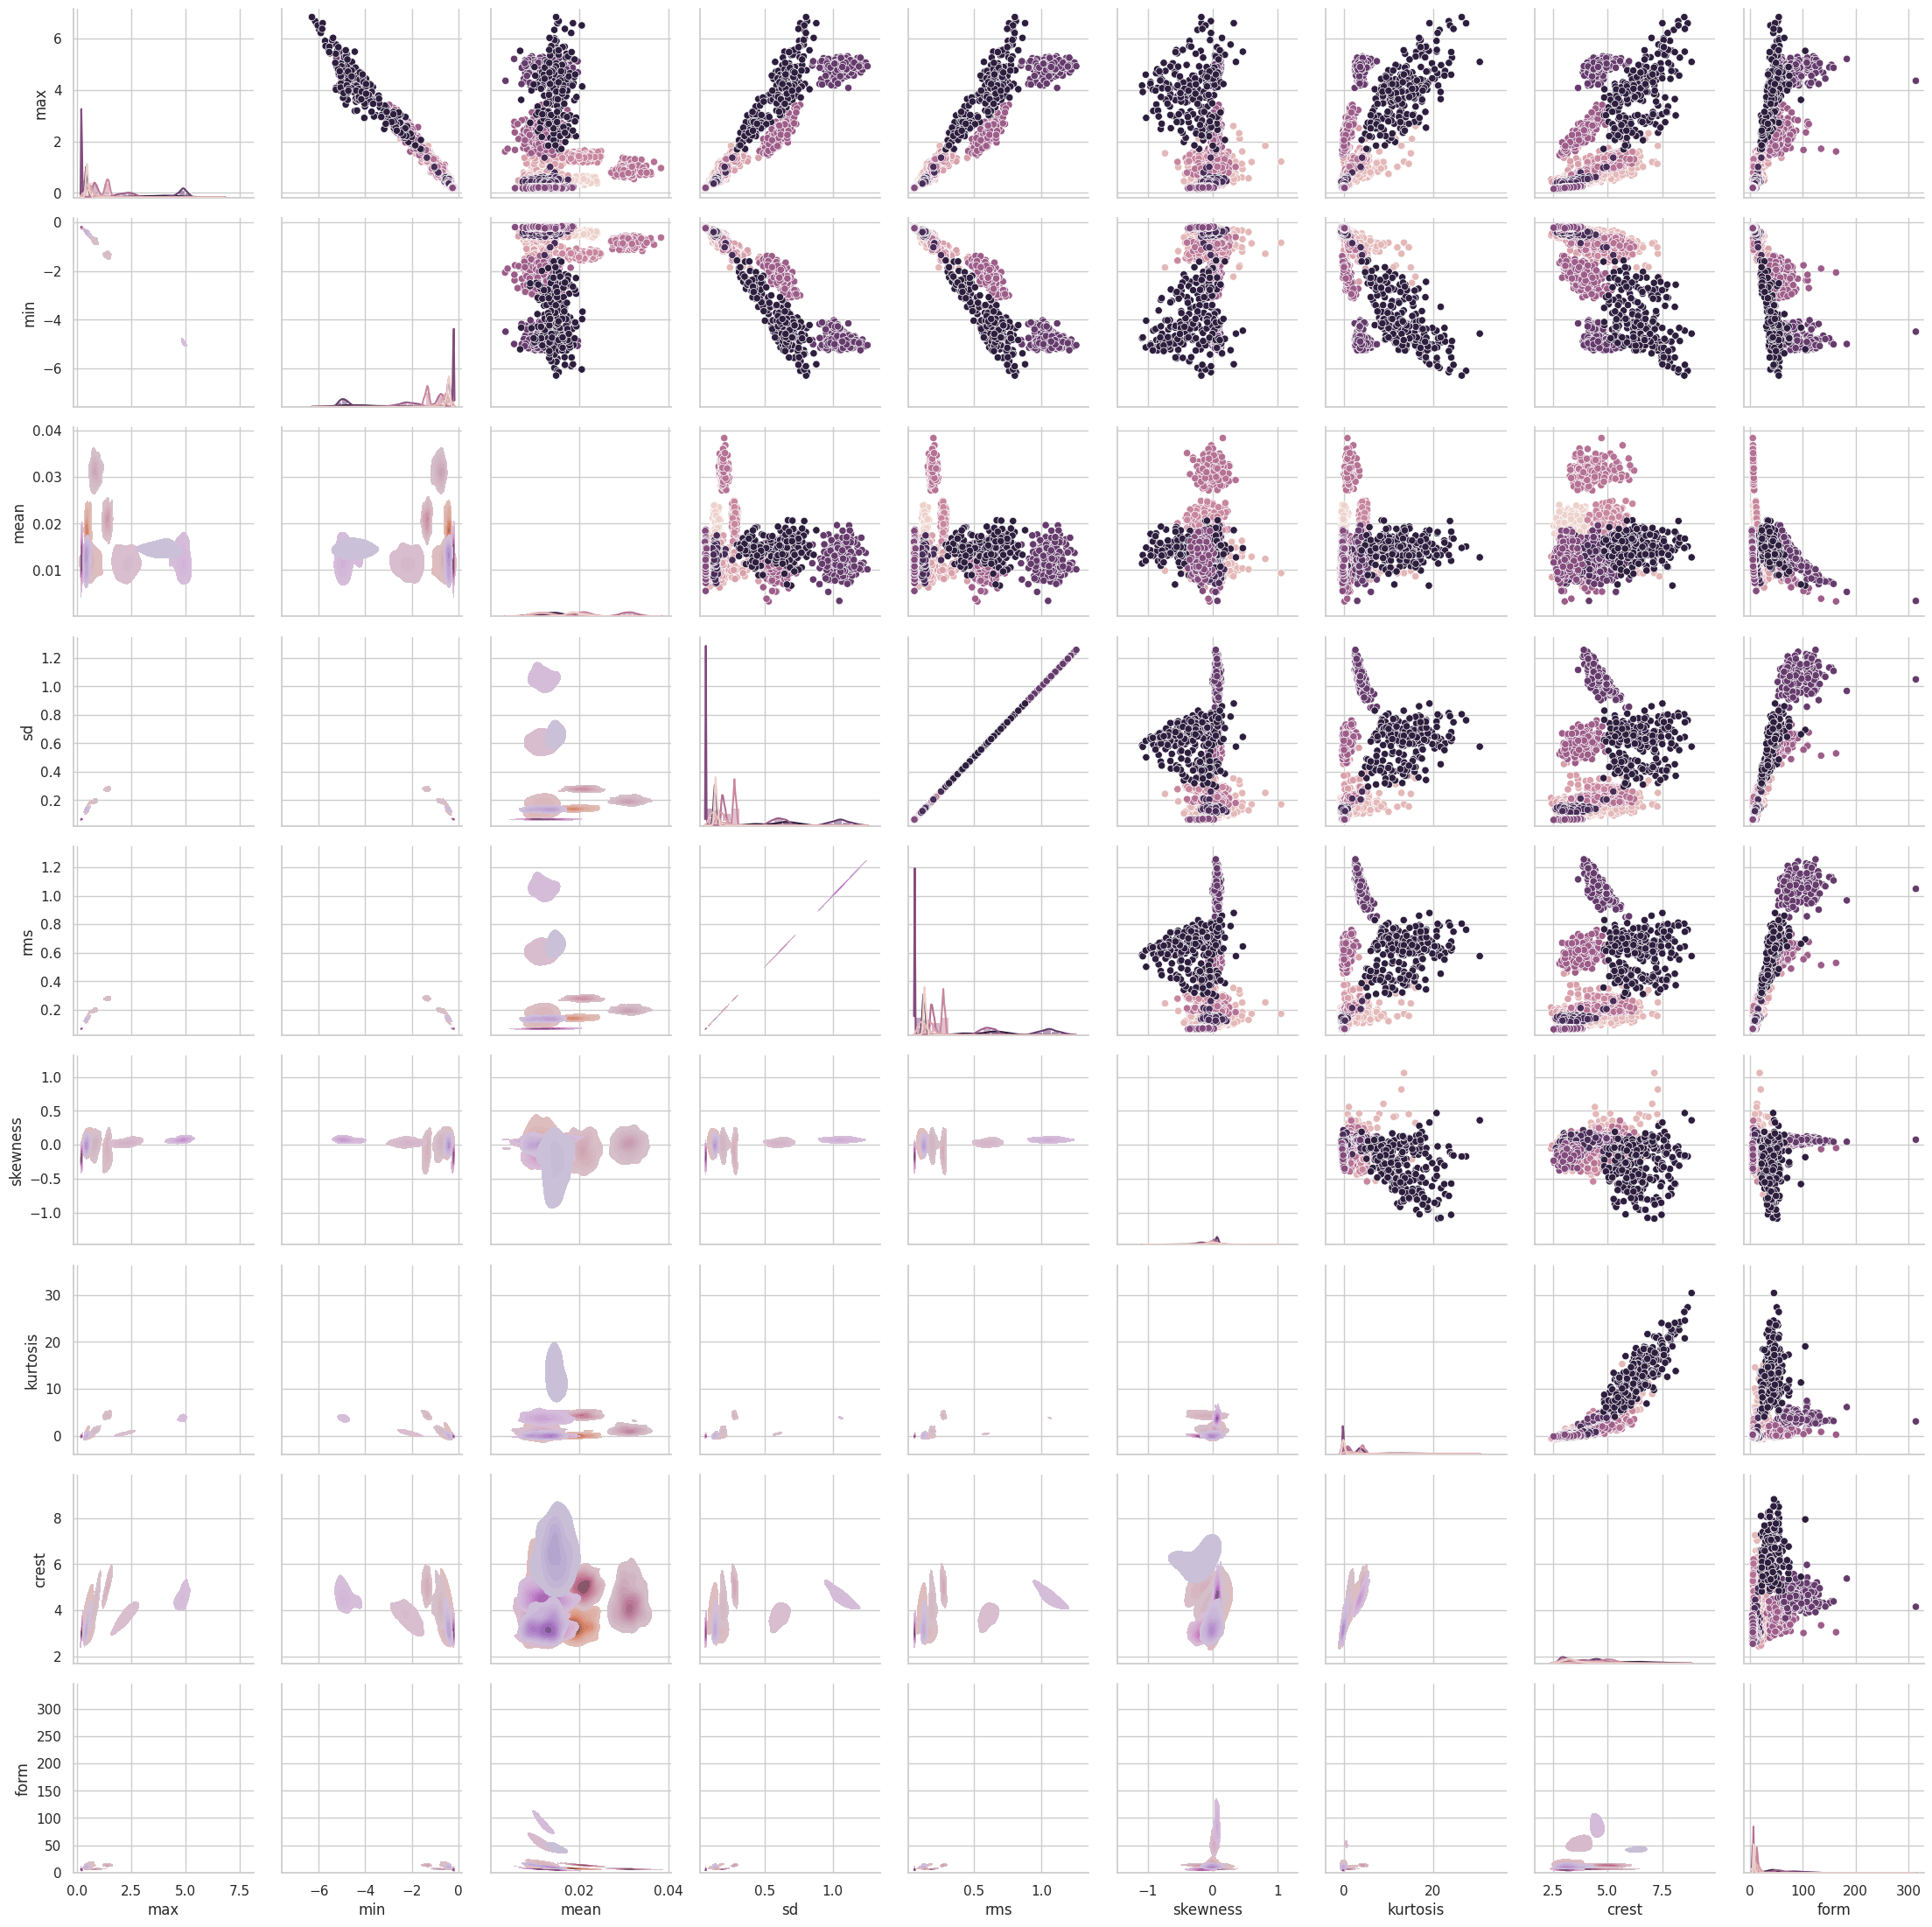

In [ ]:
# Pair Grid
g = sns.PairGrid(dataset.drop(columns=['fault']), hue='fault_encoded')
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)
plt.show()


# Pair Plot

<Figure size 5000x4000 with 0 Axes>

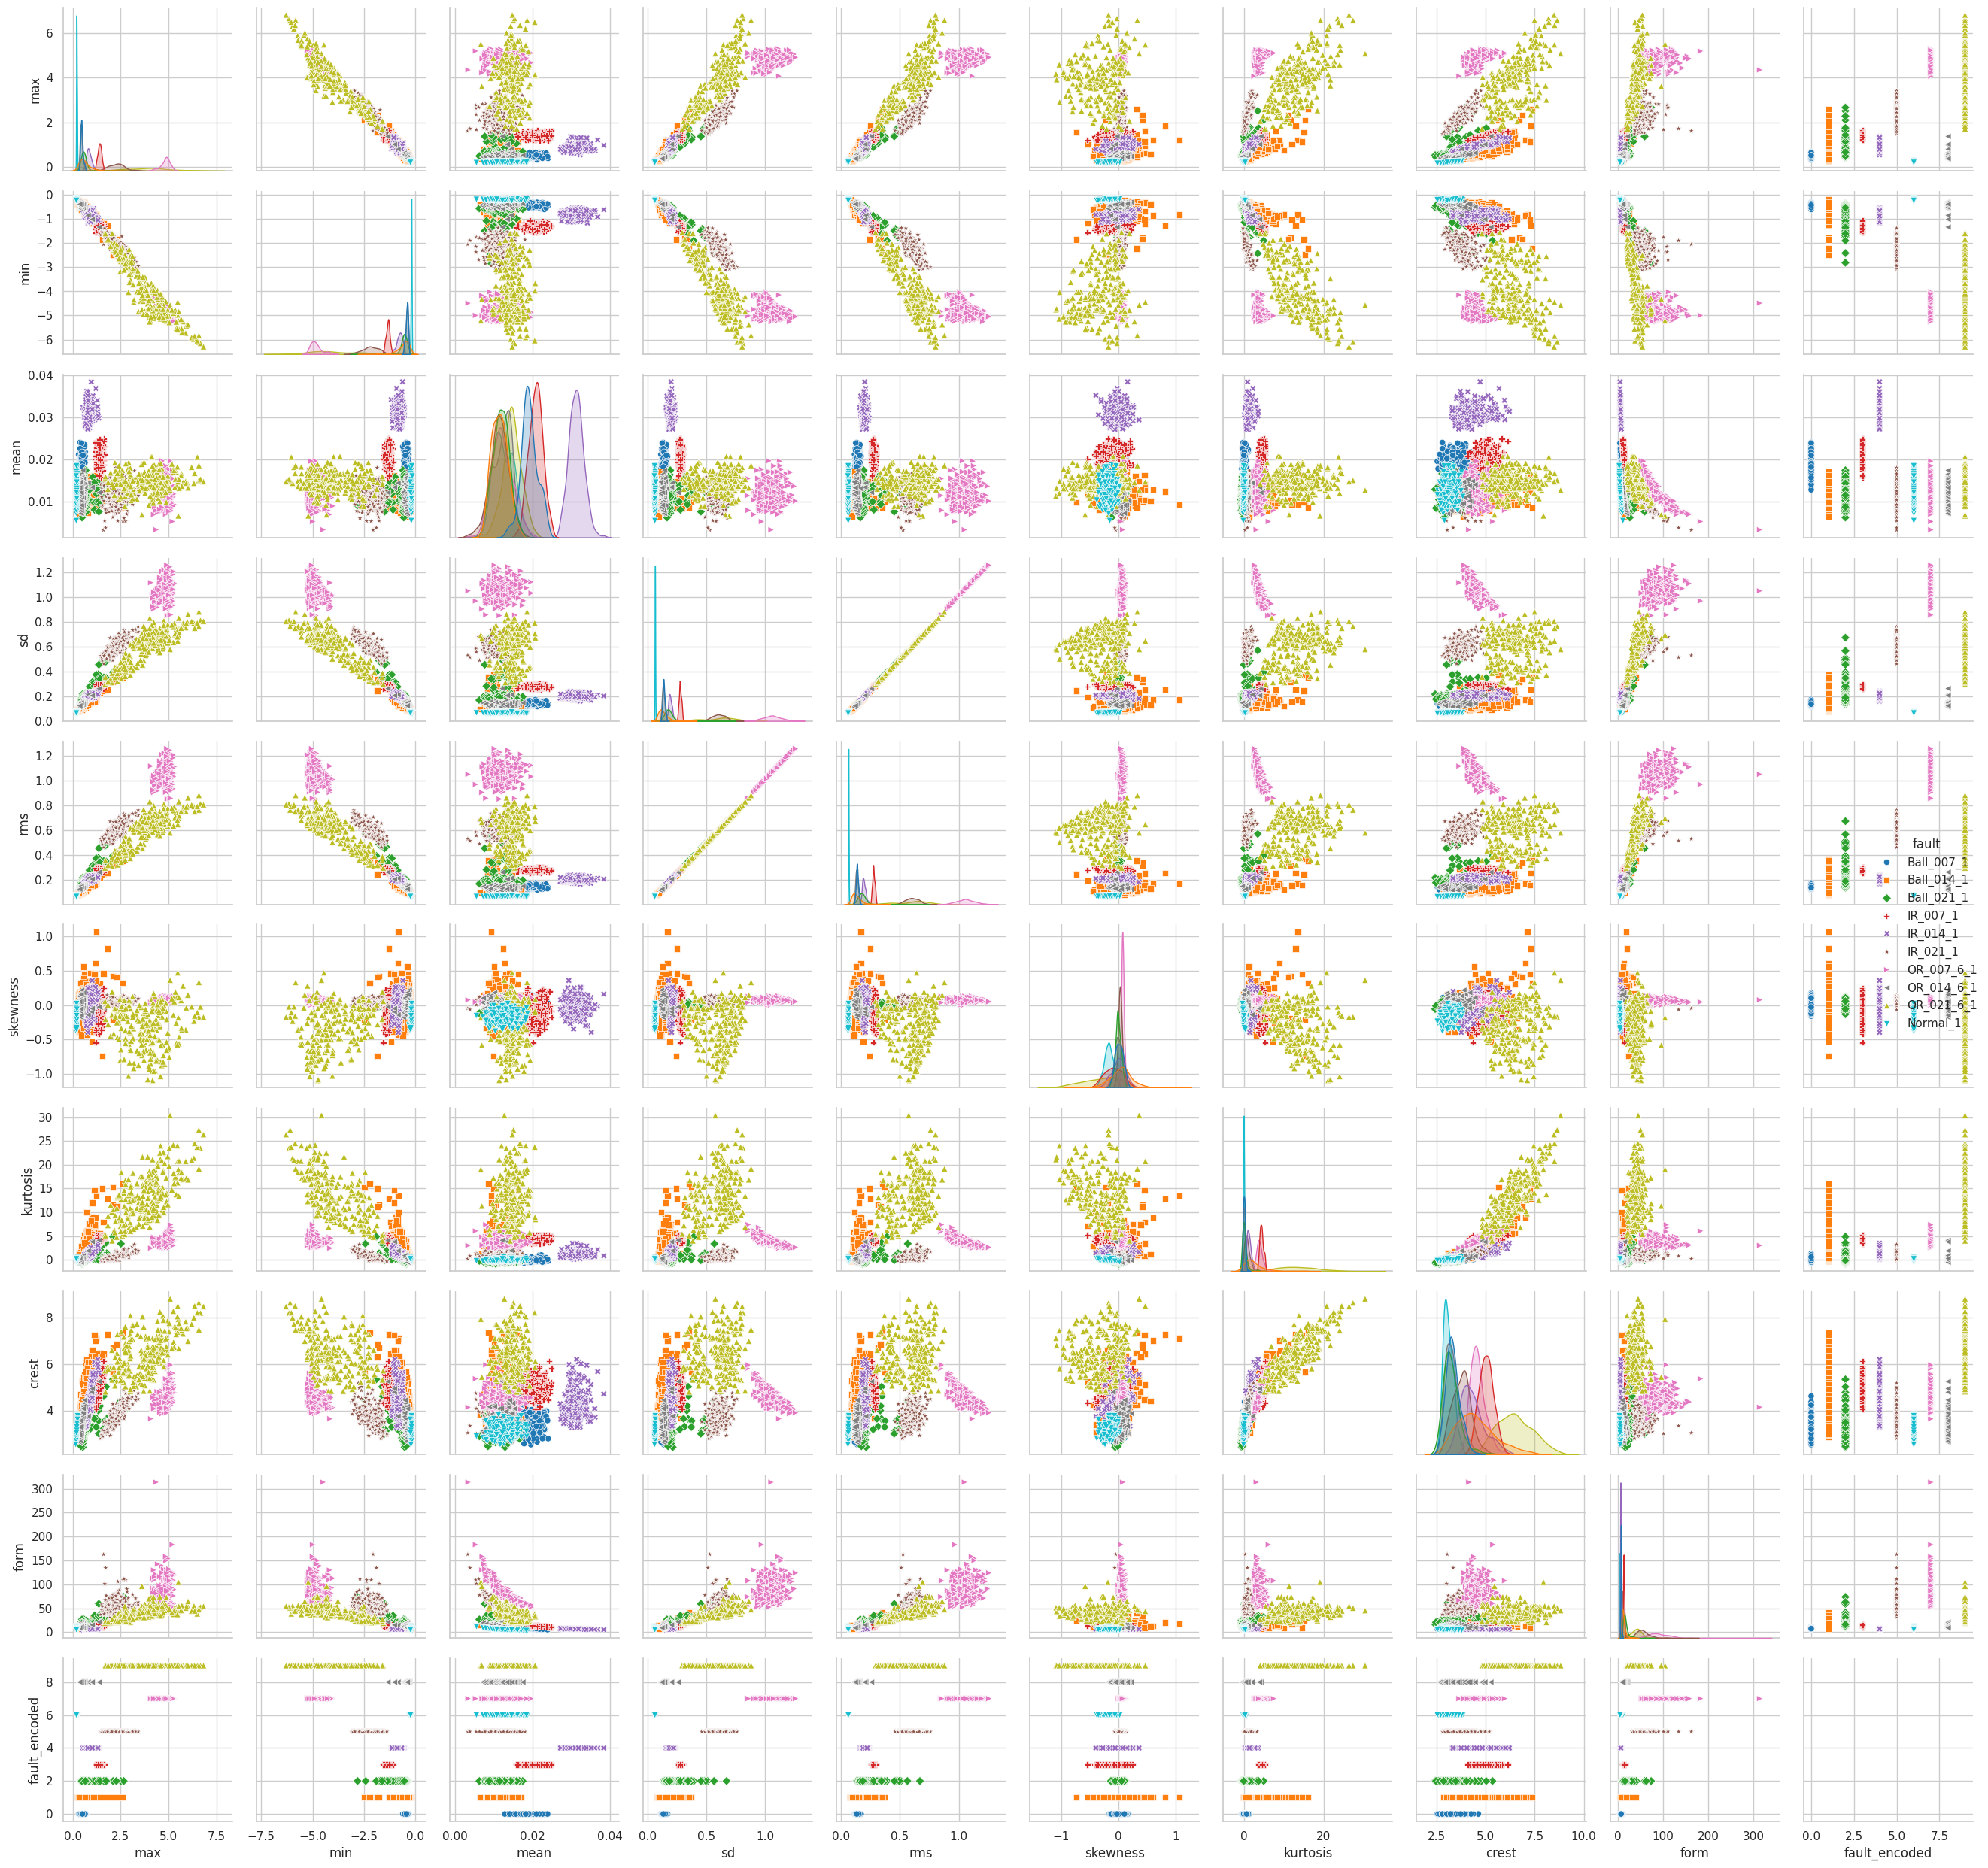

In [ ]:
# Suppress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Set figure size
plt.figure(figsize=(50, 40))

# Create pair plot
sns.pairplot(dataset, hue='fault', markers=['o', 's', 'D', 'P', 'X', '*', '>', '<', '^', 'v'], palette='tab10')

plt.tight_layout()
plt.show()

# Box Plots

In [ ]:
# Box Plots
plt.figure(figsize=(20, 16))
sns.boxplot(x='fault', y='max', data=dataset)
plt.title('Max Value Distribution by Fault Category')
plt.xlabel('Fault Category')
plt.ylabel('Max Value')
plt.xticks(rotation=45)
plt.show()

# Plot Correlation

In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# Encoding the 'fault' column
if 'fault' in dataset.columns:
    le = LabelEncoder()
    dataset['fault_encoded'] = le.fit_transform(dataset['fault'])

In [ ]:
corr_columns = dataset.drop(columns=['fault', 'fault_encoded']).columns
corr_target = dataset[corr_columns].corrwith(dataset['fault_encoded'])
# Print numerical correlation values
print("Correlation with Target Variable (fault_encoded):\n")
print(corr_target.sort_values(ascending=False))

Correlation with Target Variable (fault_encoded):

max         0.534573
sd          0.468479
rms         0.468365
kurtosis    0.432124
form        0.421635
crest       0.310771
mean       -0.210799
skewness   -0.290814
min        -0.546029
dtype: float64


In [ ]:
# Select columns for correlation calculation
corr_columns = dataset.drop(columns=['fault', 'fault_encoded']).columns

# Calculate correlation matrix
corr_target = dataset[corr_columns].corrwith(dataset['fault_encoded'])

# Plot correlation with target variable
plt.figure(figsize=(10, 6))
corr_target.sort_values(ascending=False).plot(kind='bar')
plt.title('Correlation with Target Variable (fault_encoded)')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
dataset

fault      max      min      mean        sd       rms  skewness  \
0     Ball_007_1  0.35986 -0.41890  0.017840  0.122746  0.124006 -0.118571   
1     Ball_007_1  0.46772 -0.36111  0.022255  0.132488  0.134312  0.174699   
2     Ball_007_1  0.46855 -0.43809  0.020470  0.149651  0.151008  0.040339   
3     Ball_007_1  0.58475 -0.54303  0.020960  0.157067  0.158422 -0.023266   
4     Ball_007_1  0.44685 -0.57891  0.022167  0.138189  0.139922 -0.081534   
...          ...      ...      ...       ...       ...       ...       ...   
2295    Normal_1  0.21425 -0.19839  0.010769  0.064100  0.064983 -0.212497   
2296    Normal_1  0.21967 -0.20882  0.013136  0.068654  0.069883 -0.061308   
2297    Normal_1  0.20799 -0.21613  0.012571  0.067128  0.068279 -0.154754   
2298    Normal_1  0.21425 -0.22405  0.012608  0.066813  0.067977 -0.326966   
2299    Normal_1  0.19610 -0.24721  0.012209  0.063243  0.064396 -0.351762   

      kurtosis     crest      form  fault_encoded  
0    -0.042219  2.901946  6.950855              0  
1    -0.081548  3.482334  6.035202              0  
2    -0.274069  3.102819  7.376926              0  
3     0.134692  3.691097  7.558387              0  
4     0.402783  3.193561  6.312085              0  
...        ...       ...       ...            ...  
2295 -0.119312  3.297037  6.034174              6  
2296 -0.295122  3.143410  5.319958              6  
2297 -0.071405  3.046161  5.431299              6  
2298  0.023662  3.151821  5.391672              6  
2299  0.226294  3.045244  5.274392              6  

[2300 rows x 11 columns]

In [10]:
# Preprocess the data
# Assuming 'label' is the column with fault categories
X = dataset.drop(columns=['fault','fault_encoded'], axis=1)
y = dataset['fault']

# Handle missing values if any
X.fillna(X.mean(), inplace=True)

# Normalize/Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

# Save the scaler and PCA objects
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(pca, 'pca.pkl')

['pca.pkl']

In [ ]:
# Split the data into 80% training and 80% train set
X_train, X_temp, y_train, y_temp = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify= y)

# Further split the training data into 10% test and 10% validation set
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify= y_temp)

# SVM

In [ ]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

# Initialize the KFold object
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize the GridSearchCV object with KFold
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=kfold)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=

In [ ]:
# Display the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Optionally, you can save the best model for future use
import joblib
joblib.dump(best_model, 'best_svm_model.pkl')

Best Hyperparameters: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}


['best_svm_model.pkl']

Training Classification Report:
               precision    recall  f1-score   support

  Ball_007_1       0.98      0.97      0.98       184
  Ball_014_1       0.98      0.96      0.97       184
  Ball_021_1       0.98      0.98      0.98       184
    IR_007_1       1.00      1.00      1.00       184
    IR_014_1       1.00      1.00      1.00       184
    IR_021_1       1.00      1.00      1.00       184
    Normal_1       1.00      1.00      1.00       184
  OR_007_6_1       1.00      1.00      1.00       184
  OR_014_6_1       0.94      0.97      0.95       184
  OR_021_6_1       1.00      1.00      1.00       184

    accuracy                           0.99      1840
   macro avg       0.99      0.99      0.99      1840
weighted avg       0.99      0.99      0.99      1840



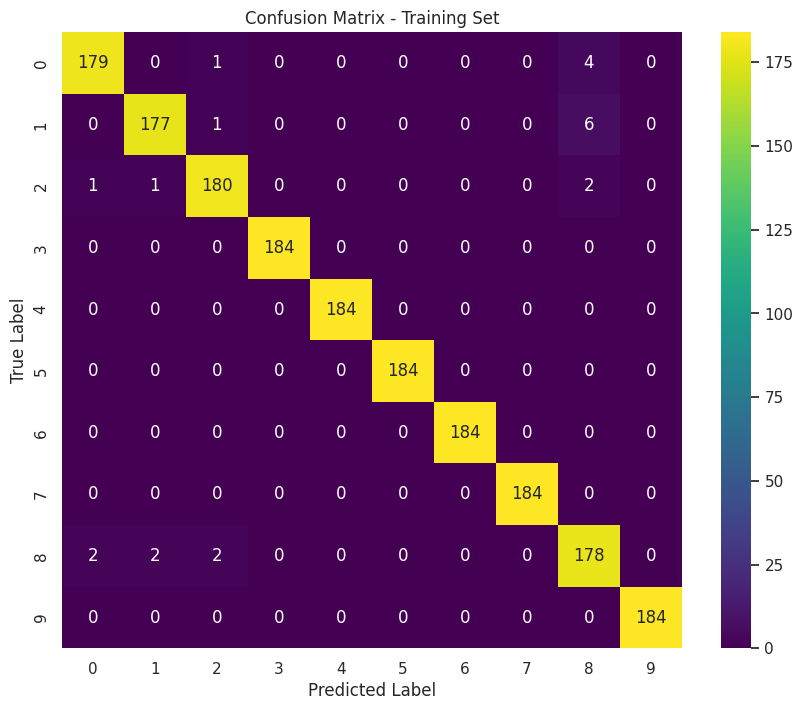

In [ ]:

# Initialize the model with the best parameters
model = SVC(**grid_search.best_params_)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the training set
y_train_pred = model.predict(X_train)

# Print classification report for the training set
print("Training Classification Report:\n", classification_report(y_train, y_train_pred))

# Compute confusion matrix
cm = confusion_matrix(y_train, y_train_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', cbar=True)
plt.title('Confusion Matrix - Training Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Validation Classification Report:
               precision    recall  f1-score   support

  Ball_007_1       1.00      0.87      0.93        23
  Ball_014_1       0.84      0.70      0.76        23
  Ball_021_1       0.73      0.83      0.78        23
    IR_007_1       1.00      0.96      0.98        23
    IR_014_1       1.00      1.00      1.00        23
    IR_021_1       0.95      0.91      0.93        23
    Normal_1       1.00      0.96      0.98        23
  OR_007_6_1       1.00      0.96      0.98        23
  OR_014_6_1       0.71      0.87      0.78        23
  OR_021_6_1       0.88      1.00      0.94        23

    accuracy                           0.90       230
   macro avg       0.91      0.90      0.91       230
weighted avg       0.91      0.90      0.91       230



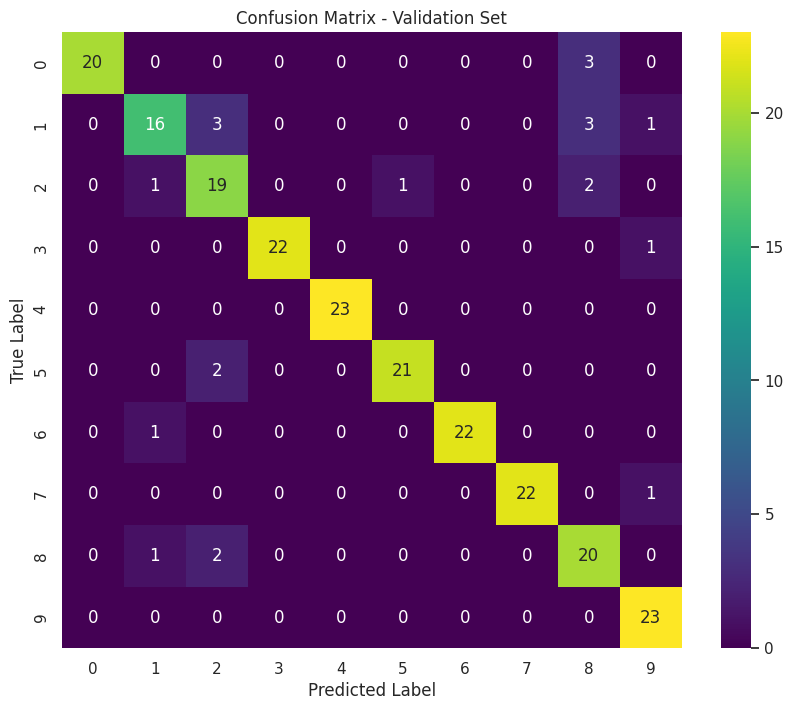

In [ ]:
# Predict on the validation set
y_val_pred = model.predict(X_val)

# Print classification report for the validation set
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))

# Compute confusion matrix
cm = confusion_matrix(y_val, y_val_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', cbar=True)
plt.title('Confusion Matrix - Validation Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Predict on the test set
y_test_pred = model.predict(X_test)

# Print classification report for the test set
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', cbar=True)
plt.title('Confusion Matrix - Validation Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Test Classification Report:
               precision    recall  f1-score   support

  Ball_007_1       0.91      0.87      0.89        23
  Ball_014_1       0.86      0.83      0.84        23
  Ball_021_1       0.90      0.83      0.86        23
    IR_007_1       0.96      1.00      0.98        23
    IR_014_1       1.00      1.00      1.00        23
    IR_021_1       0.96      1.00      0.98        23
    Normal_1       1.00      0.91      0.95        23
  OR_007_6_1       1.00      1.00      1.00        23
  OR_014_6_1       0.70      0.83      0.76        23
  OR_021_6_1       0.96      0.96      0.96        23

    accuracy                           0.92       230
   macro avg       0.93      0.92      0.92       230
weighted avg       0.93      0.92      0.92       230



In [ ]:
# Load the trained model
best_model = joblib.load('best_svm_model.pkl')

# Load the scaler and PCA objects used during training
scaler = joblib.load('scaler.pkl')
pca = joblib.load('pca.pkl')



# New samples (replace this with your actual data)
new_samples = pd.DataFrame({
    'max': [1.5068],
    'min': [-1.3948],
    'mean': [0.019],
    'sd': [0.26],
    'rms': [0.26],
    'skewness':[-0.1074],
    'kurtosis': [4.40],
    'crest': [5.729],
    'form': [13.51]
})

# Step 1: Preprocess the new samples
# Handle missing values if any (assuming the same approach as before)
new_samples.fillna(new_samples.mean(), inplace=True)

# Normalize/Scale the features
new_samples_scaled = scaler.transform(new_samples)

# Apply PCA
new_samples_pca = pca.transform(new_samples_scaled)

# Step 2: Make predictions
predictions = best_model.predict(new_samples_pca)

# Output the predictions
print(predictions)

['IR_007_1']


# Random Forest

In [ ]:
# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the KFold object
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize the GridSearchCV object with KFold
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, refit=True, verbose=2, cv=kfold)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

Fitting 10 folds for each of 216 candidates, totalling 2160 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; to

Training Classification Report:
               precision    recall  f1-score   support

  Ball_007_1       1.00      1.00      1.00       184
  Ball_014_1       1.00      1.00      1.00       184
  Ball_021_1       1.00      1.00      1.00       184
    IR_007_1       1.00      1.00      1.00       184
    IR_014_1       1.00      1.00      1.00       184
    IR_021_1       1.00      1.00      1.00       184
    Normal_1       1.00      1.00      1.00       184
  OR_007_6_1       1.00      1.00      1.00       184
  OR_014_6_1       1.00      1.00      1.00       184
  OR_021_6_1       1.00      1.00      1.00       184

    accuracy                           1.00      1840
   macro avg       1.00      1.00      1.00      1840
weighted avg       1.00      1.00      1.00      1840



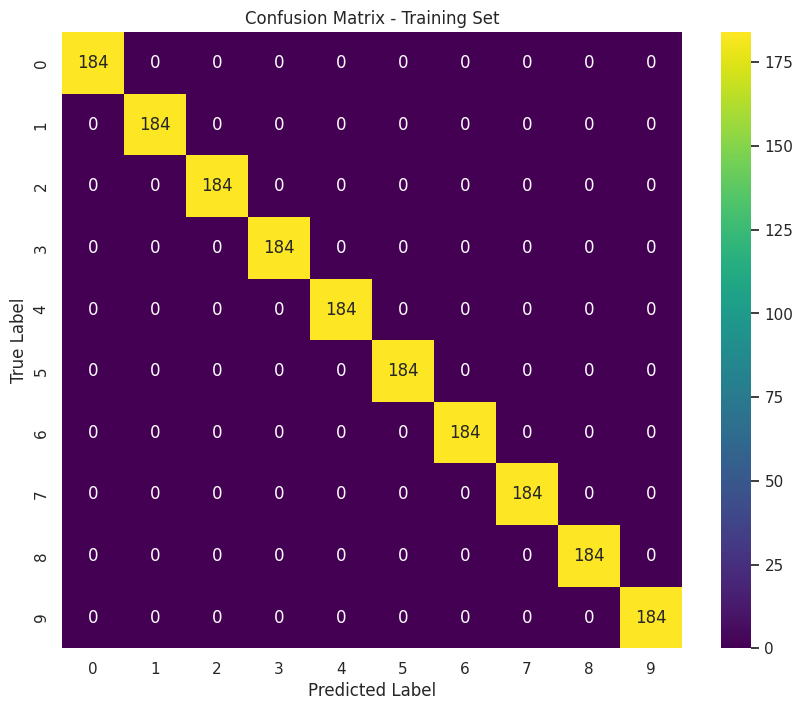

In [ ]:
# Initialize the model with the best parameters
model = RandomForestClassifier(**grid_search.best_params_)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the training set
y_train_pred = model.predict(X_train)

# Print classification report for the training set
print("Training Classification Report:\n", classification_report(y_train, y_train_pred))

# Compute confusion matrix
cm = confusion_matrix(y_train, y_train_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', cbar=True)
plt.title('Confusion Matrix - Training Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
# Predict on the validation set
y_val_pred = model.predict(X_val)

# Print classification report for the validation set
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))

# Compute confusion matrix
cm = confusion_matrix(y_val, y_val_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', cbar=True)
plt.title('Confusion Matrix - Validation Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Validation Classification Report:
               precision    recall  f1-score   support

  Ball_007_1       0.90      0.83      0.86        23
  Ball_014_1       0.81      0.74      0.77        23
  Ball_021_1       0.65      0.74      0.69        23
    IR_007_1       1.00      0.96      0.98        23
    IR_014_1       0.96      1.00      0.98        23
    IR_021_1       0.92      1.00      0.96        23
    Normal_1       1.00      1.00      1.00        23
  OR_007_6_1       1.00      1.00      1.00        23
  OR_014_6_1       0.77      0.74      0.76        23
  OR_021_6_1       1.00      1.00      1.00        23

    accuracy                           0.90       230
   macro avg       0.90      0.90      0.90       230
weighted avg       0.90      0.90      0.90       230



In [ ]:
# Predict on the test set
y_test_pred = model.predict(X_test)

# Print classification report for the test set
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', cbar=True)
plt.title('Confusion Matrix - Validation Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Test Classification Report:
               precision    recall  f1-score   support

  Ball_007_1       0.91      0.87      0.89        23
  Ball_014_1       0.82      0.78      0.80        23
  Ball_021_1       0.85      0.74      0.79        23
    IR_007_1       1.00      1.00      1.00        23
    IR_014_1       1.00      1.00      1.00        23
    IR_021_1       0.96      1.00      0.98        23
    Normal_1       1.00      1.00      1.00        23
  OR_007_6_1       1.00      1.00      1.00        23
  OR_014_6_1       0.58      0.65      0.61        23
  OR_021_6_1       0.96      1.00      0.98        23

    accuracy                           0.90       230
   macro avg       0.91      0.90      0.90       230
weighted avg       0.91      0.90      0.90       230



In [ ]:
# Display the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Optionally, you can save the best model for future use
import joblib
joblib.dump(best_model, 'best_rf_model.pkl')

Best Hyperparameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


['best_rf_model.pkl']

In [ ]:
# Load the trained model
best_model = joblib.load('best_rf_model.pkl')

# Load the scaler and PCA objects used during training
scaler = joblib.load('scaler.pkl')
pca = joblib.load('pca.pkl')



# New samples (replace this with your actual data)
new_samples = pd.DataFrame({
    'max': [1.5068],
    'min': [-1.3948],
    'mean': [0.019],
    'sd': [0.26],
    'rms': [0.26],
    'skewness':[-0.1074],
    'kurtosis': [4.40],
    'crest': [5.729],
    'form': [13.51]
})

# Step 1: Preprocess the new samples
# Handle missing values if any (assuming the same approach as before)
new_samples.fillna(new_samples.mean(), inplace=True)

# Normalize/Scale the features
new_samples_scaled = scaler.transform(new_samples)

# Apply PCA
new_samples_pca = pca.transform(new_samples_scaled)

# Step 2: Make predictions
predictions = best_model.predict(new_samples_pca)

# Output the predictions
print(predictions)

['IR_007_1']


## DNN

In [6]:
# Encode labels
le = LabelEncoder()
dataset['fault'] = le.fit_transform(dataset['fault'])

In [7]:
x = dataset.drop(columns=['fault'], axis=1)
y = dataset['fault']

In [11]:
# Split the data into 80% training and 80% train set
X_train, X_temp, y_train, y_temp = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify= y)

# Further split the training data into 10% test and 10% validation set
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify= y_temp)

Epoch 1/100
58/58 [==============================] - 1s 7ms/step - loss: 2.0552 - accuracy: 0.2995 - val_loss: 1.5879 - val_accuracy: 0.4826
Epoch 2/100
58/58 [==============================] - 0s 3ms/step - loss: 1.3569 - accuracy: 0.5364 - val_loss: 0.8219 - val_accuracy: 0.7739
Epoch 3/100
58/58 [==============================] - 0s 3ms/step - loss: 0.9378 - accuracy: 0.6560 - val_loss: 0.5617 - val_accuracy: 0.8000
Epoch 4/100
58/58 [==============================] - 0s 3ms/step - loss: 0.7632 - accuracy: 0.7207 - val_loss: 0.4858 - val_accuracy: 0.8043
Epoch 5/100
58/58 [==============================] - 0s 4ms/step - loss: 0.6697 - accuracy: 0.7723 - val_loss: 0.4496 - val_accuracy: 0.8348
Epoch 6/100
58/58 [==============================] - 0s 3ms/step - loss: 0.6187 - accuracy: 0.7658 - val_loss: 0.4166 - val_accuracy: 0.8304
Epoch 7/100
58/58 [==============================] - 0s 3ms/step - loss: 0.5666 - accuracy: 0.7978 - val_loss: 0.4105 - val_accuracy: 0.8130
Epoch 8/100
5

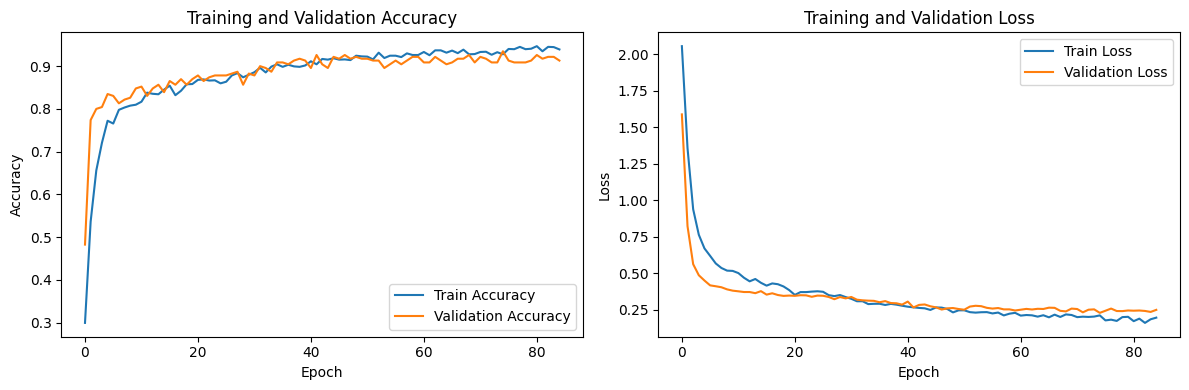

In [20]:
from tensorflow.keras.callbacks import EarlyStopping
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
num_classes = dataset['fault'].nunique()
# Build a deeper neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [24]:
# Predict the labels
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_.tolist(), yticklabels=le.classes_.tolist())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
class_report = classification_report(y_test, y_pred_classes, target_names=[str(cls) for cls in le.classes_])
print('Classification Report')
print(class_report)

8/8 [==============================] - 0s 2ms/step


Classification Report
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        23
           1       0.83      0.83      0.83        23
           2       0.95      0.78      0.86        23
           3       0.96      1.00      0.98        23
           4       1.00      1.00      1.00        23
           5       0.92      1.00      0.96        23
           6       0.88      1.00      0.94        23
           7       1.00      1.00      1.00        23
           8       0.79      0.83      0.81        23
           9       0.96      0.96      0.96        23

    accuracy                           0.93       230
   macro avg       0.93      0.93      0.93       230
weighted avg       0.93      0.93      0.93       230

